In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [3]:
def normalizza(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    return (X-mu)/sigma

In [4]:
import urllib.request

filepath = "../dataset/"
url = "https://tvml.github.io/ml1920/dataset/"

def get_file(filename,local):
    if local:
        return filepath+filename
    else:
        urllib.request.urlretrieve (url+filename, filename)
        return filename

In [5]:
# legge i dati in dataframe pandas
data = pd.read_csv(get_file("mammals.csv", 1), delimiter=',')

# calcola dimensione dei dati
n = len(data)

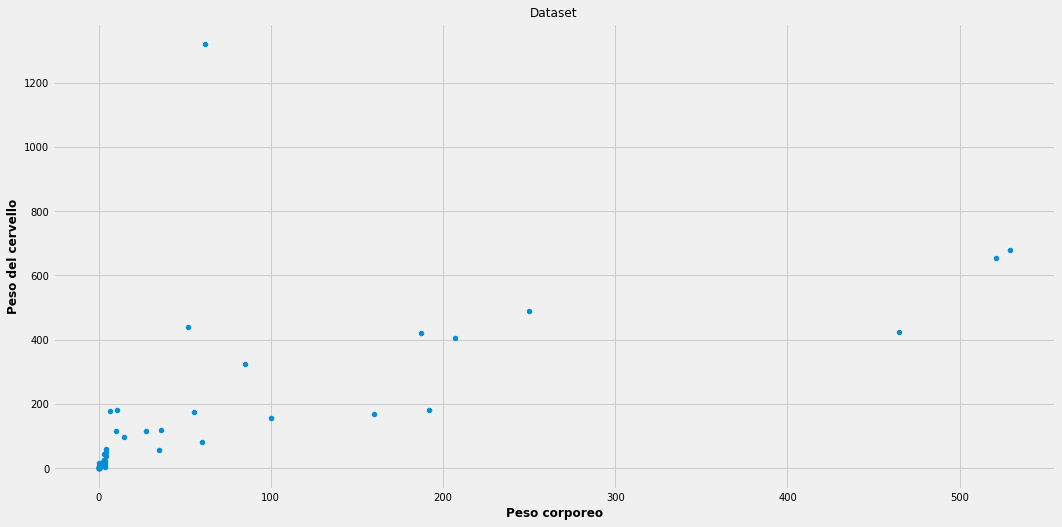

In [6]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(data.body, data.brain, s=20, marker='o', linewidths=1)
plt.xlabel(u'Peso corporeo', fontsize=12)
plt.ylabel('Peso del cervello', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

In [7]:
# Estrae dal dataframe gli array X delle features e y dei valori
X, t = np.array(data[['body']]), np.array(data['brain']).reshape((-1,1))

X=normalizza(X)
X = np.column_stack((np.ones(n), X))

In [11]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)
e=np.dot(X,w)-t
c_opt=np.dot(e.T,e)[0,0]/(2*n)
threshold = c_opt+0.05*c_opt

In [8]:
# Funzione che applica la ricerca per gradiente memorizzando la sequenza dei costi
def gradiente( X, t, w_init, alpha, iterations, n):
    w = np.copy(w_init)
    costs = []
    for i in range(iterations):
        e=np.dot(X,w)-t
        c=np.dot(e.T,e)[0,0]/(2*n)
        dw=np.dot(X.T, e)/n
        w = w-alpha*dw
        costs.append(c)
    return costs, w

In [9]:
# Inizializza il vettore dei coefficienti
w_init = np.array([0, 0]).reshape(-1,1)
iterations = 150
alphas = [0.01, 0.03, 0.1, 0.3, 0.5, 1]

number_of_iterations = range(1, iterations + 1)

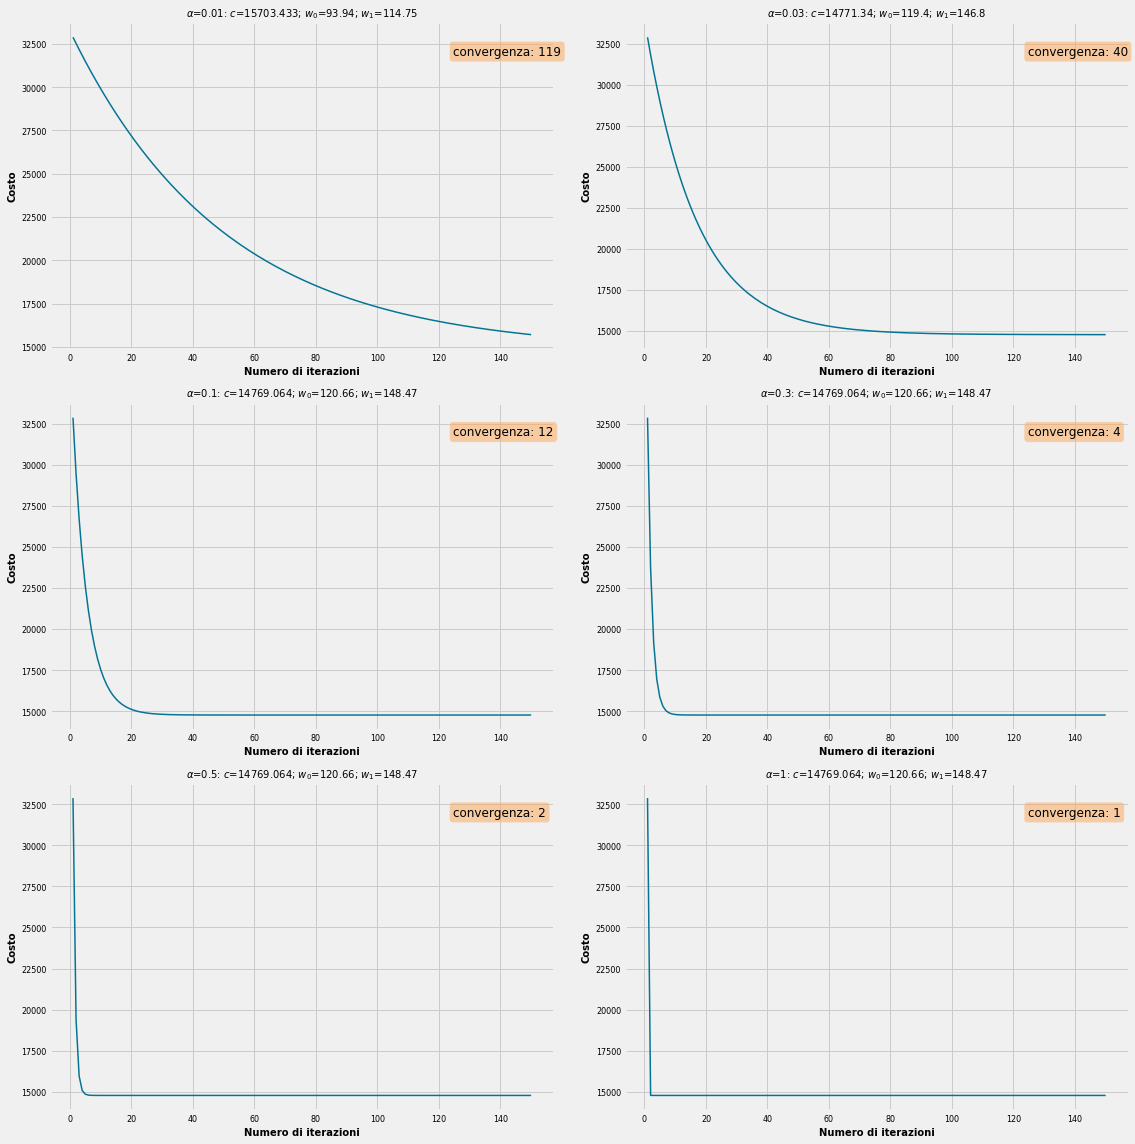

In [13]:
fig = plt.figure(figsize=(16,16))
for c,alpha in enumerate(alphas):
    costs, w = gradiente(X, t, w_init, alpha, iterations, n)
    max_index = np.max(np.where(costs > threshold)[0])+1
    ax = fig.add_subplot(3, 2, c+1)
    ax = fig.gca()
    ax.plot(number_of_iterations, costs, c= colors[1], alpha=1, lw=1.5)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel(r'Numero di iterazioni', fontsize=10)
    plt.ylabel(r'Costo', fontsize=10)
    plt.text(0.8, 0.9, 'convergenza: {0:d}'.format(max_index), fontsize=12, 
         transform=ax.transAxes, bbox=bbox_props)
    plt.title(r'$\alpha$='+str(alpha)+r': $c$='+str(round(costs[-1],3))+r'; $w_0$='+str(round(w[0][0],2))+'; $w_1$='+str(round(w[1][0],2))+'', fontsize=10)
plt.tight_layout()
plt.show()

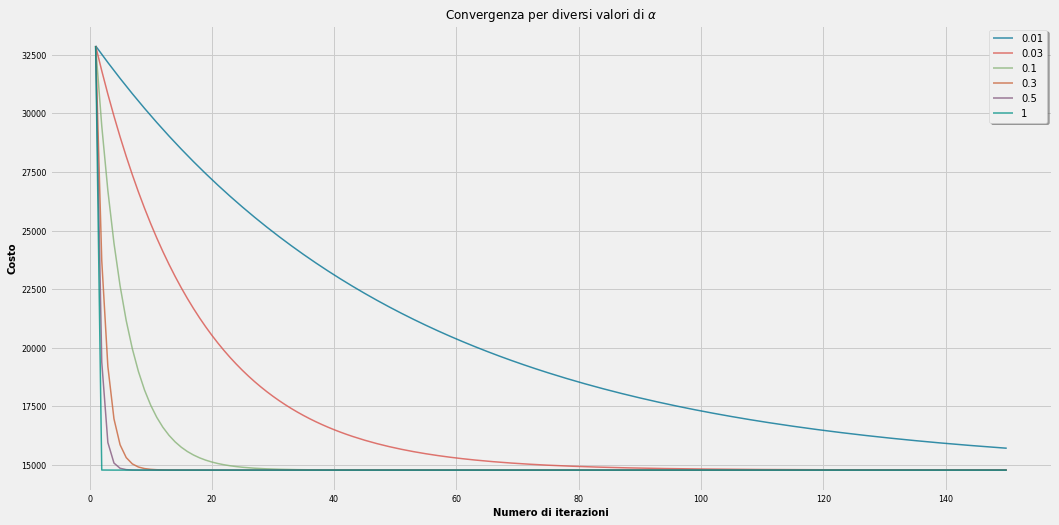

In [12]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
for c,alpha in enumerate(alphas):
    costs, w = gradiente(X, t, w_init, alpha, iterations, n)
    ax.plot(number_of_iterations, costs, c= colors[c+1], alpha=.8, lw=1.5, label=alpha)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel(r'Numero di iterazioni', fontsize=10)
plt.ylabel(r'Costo', fontsize=10)
legend = ax.legend(loc='upper right', shadow=True)
plt.title(r'Convergenza per diversi valori di $\alpha$', fontsize=12)
plt.show()